In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import seaborn as sns
from matplotlib import pyplot as plt
test=pd.read_csv("/kaggle/input/titanic/test.csv")
train=pd.read_csv("/kaggle/input/titanic/train.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic/test.csv'

In [180]:

train.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [181]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [182]:
train.shape

(891, 12)

In [183]:
test.shape

(418, 11)

In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
train['Survived'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [186]:
train["Survived"]=train["Survived"].astype('boolean')

In [187]:
train["Survived"].value_counts

<bound method IndexOpsMixin.value_counts of 0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: boolean>

In [188]:
train["Survived"]=train["Survived"].astype('int')

In [189]:
train["Survived"].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

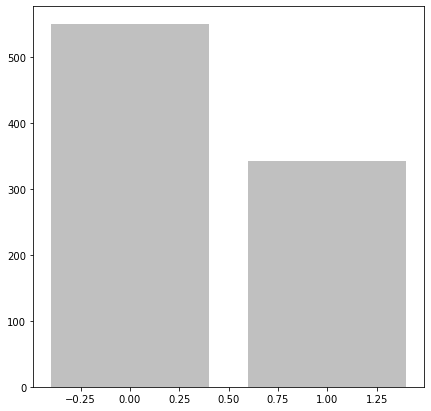

In [190]:
plt.figure(figsize=(7,7))
plt.bar(list(train["Survived"].value_counts().keys()),list(train["Survived"].value_counts()),color='silver')
plt.show()

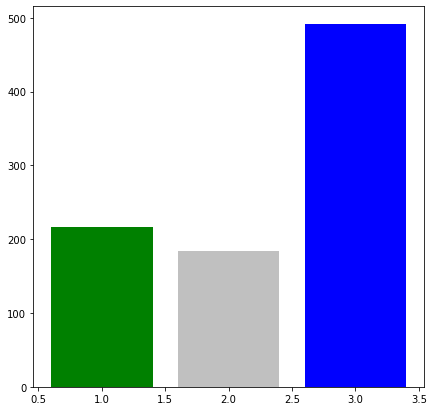

In [191]:
plt.figure(figsize=(7,7))
plt.bar(list(train["Pclass"].value_counts().keys()),list(train["Pclass"].value_counts()),color=['b','g','silver'])
plt.show()

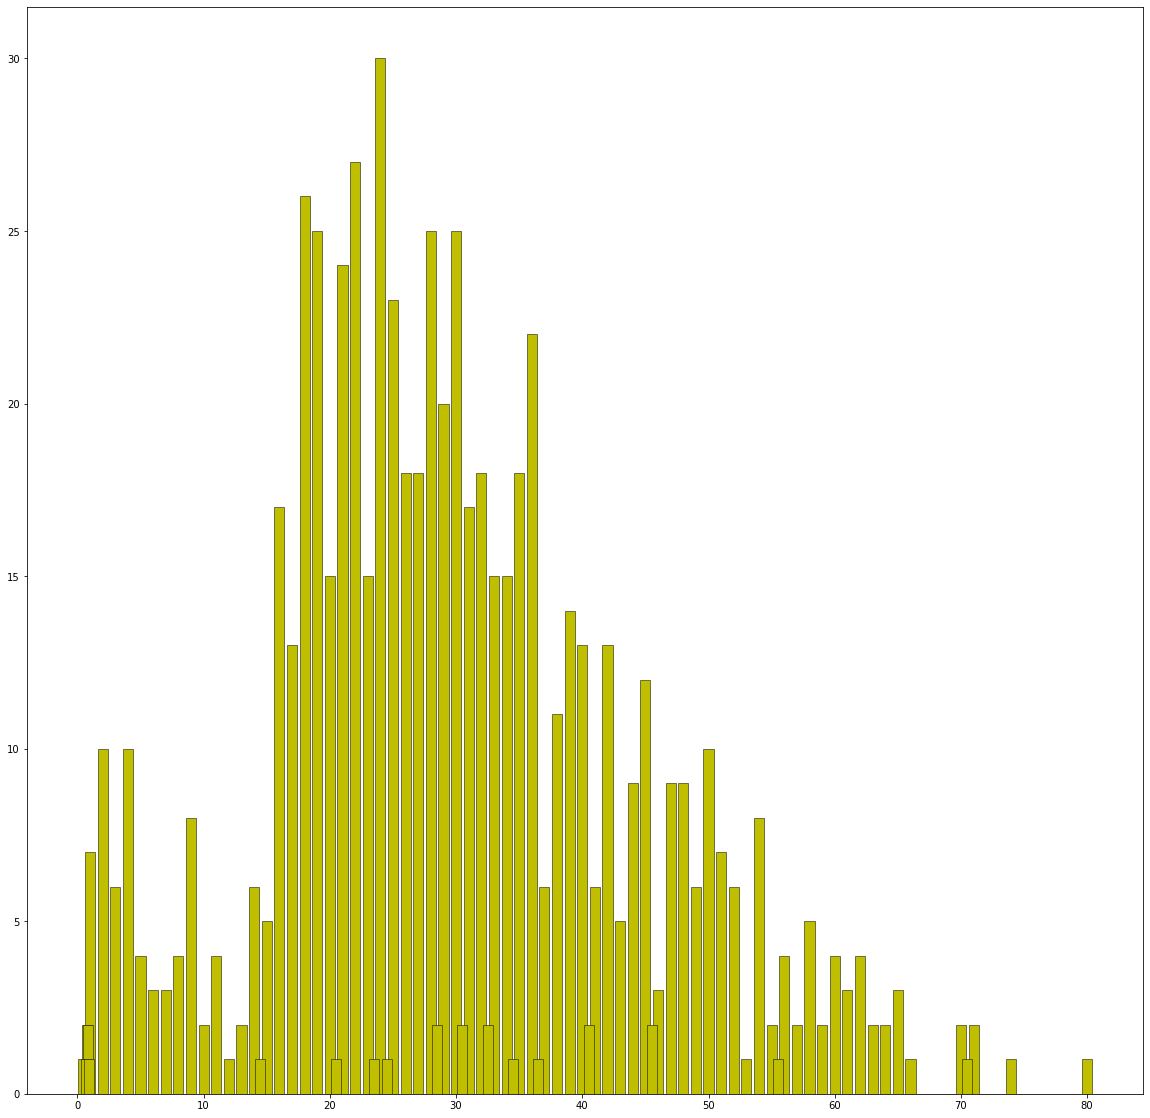

In [192]:
plt.figure(figsize=(20,20))
plt.bar(list(train["Age"].value_counts().keys()),list(train["Age"].value_counts()),color='y',edgecolor='black',linewidth=0.5)
plt.show()

In [193]:
x=list(train["Survived"].value_counts().keys())

In [194]:
x


[0, 1]

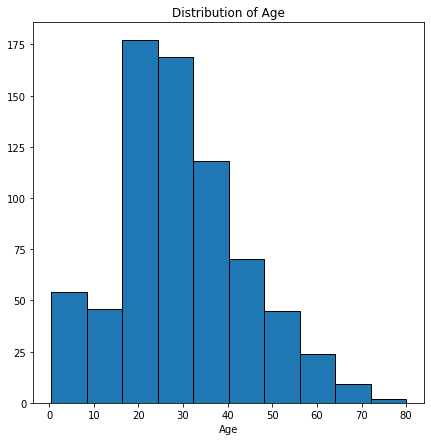

In [195]:
plt.figure(figsize=(7,7))
plt.hist(train["Age"],edgecolor='black',linewidth=1)
plt.title("Distribution of Age")
plt.xlabel("Age")

plt.show()

In [196]:
sum(train['Survived'].isnull())

0

In [197]:
train['Pclass'].value_counts


<bound method IndexOpsMixin.value_counts of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>

In [198]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

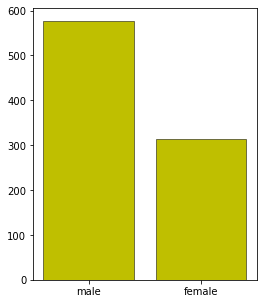

In [200]:
plt.figure(figsize=(4,5))
plt.bar(list(train["Sex"].value_counts().keys()),list(train["Sex"].value_counts()),color='y',edgecolor='black',linewidth=0.5)
plt.show()

In [201]:
sum(train['Age'].isnull())

177

In [216]:
train=test.dropna()

In [217]:
sum(train['Age'].isnull())

0

In [220]:
sum(train['Survived'].isnull())

KeyError: 'Survived'

In [221]:
x_train=train[['Age']]
y_train=train[['Survived']]

KeyError: "None of [Index(['Survived'], dtype='object')] are in the [columns]"

In [222]:
train.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
34,926,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.7500,C78,C
44,936,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S
46,938,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
50,942,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,13695,60.0000,C31,S


In [224]:
train.shape



(87, 11)

In [225]:
from sklearn.tree import DecisionTreeClassifier 


In [226]:
dtc = DecisionTreeClassifier() 

In [227]:
dtc.fit(x_train,y_train)

ValueError: Number of labels=891 does not match number of samples=87

In [215]:
train=test.dropna()